In [244]:
import tifffile as tiff
import matplotlib.pyplot as plt
import numpy as np

image = tiff.imread('data/X.tiff') 

# Satellite

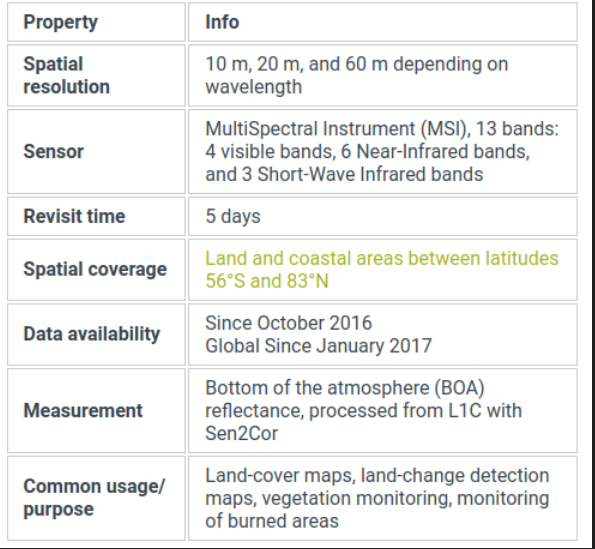

Spatial resolution = physical dimension that represents a pixel of the image


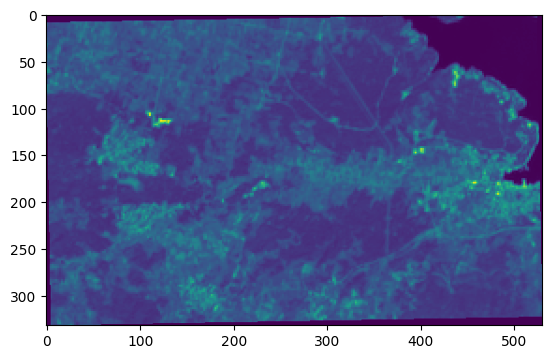

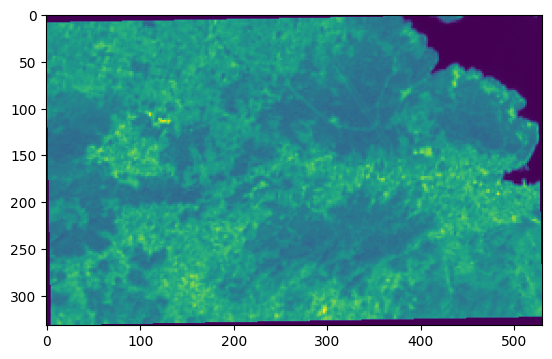

In [245]:
plt.imshow(image[:,:,4])
plt.show()
plt.imshow(image[:,:,8])

In [246]:
image.shape

(332, 530, 13)

Here we have a short description of the bands which are used in the Sentinel-2 LSA.   

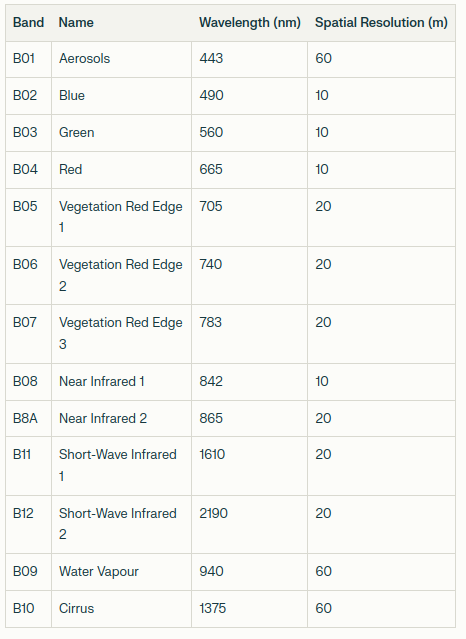

# Normalized Difference Vegetation Index

It is used for the purposes of the vegation health detection. 
The area with healthy and dense vegetation health will have values closer to the 1.  
NDVI with no vegatiton will have values closer to the zero and the NDVI with the values 
to the -1 will have values closer to the -1. 

### NDVI = (NIR-RED)/(NIR+RED)


/tmp/ipykernel_5327/2820940216.py:1: RuntimeWarning: invalid value encountered in divide
  X = (image[:,:,4] - image[:,:,8])/(image[:,:,4] + image[:,:,8])


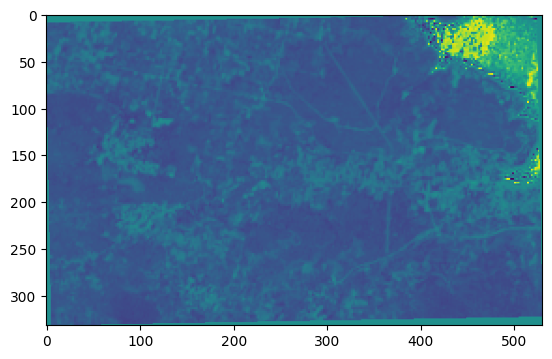

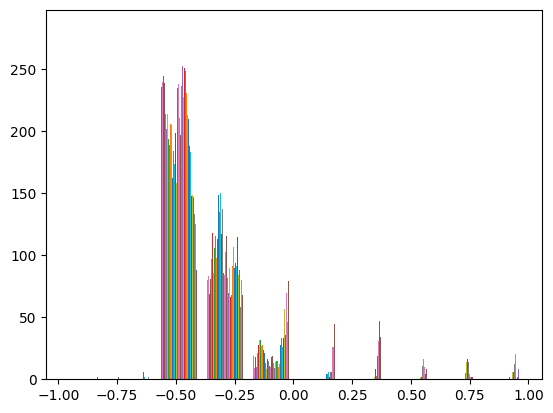

In [261]:
X = (image[:,:,4] - image[:,:,8])/(image[:,:,4] + image[:,:,8])
X = np.nan_to_num(X)
plt.imshow(X)
plt.show()
plt.hist(X)
plt.show()

# Normalized Difference Moisture Index

Used for the moisture level detection for the vegetation. 

https://www.usgs.gov/landsat-missions/normalized-difference-moisture-index  

/tmp/ipykernel_5327/409900472.py:1: RuntimeWarning: invalid value encountered in divide
  Y = (image[:,:,8] - image[:,:,11])/(image[:,:,8] + image[:,:,11])


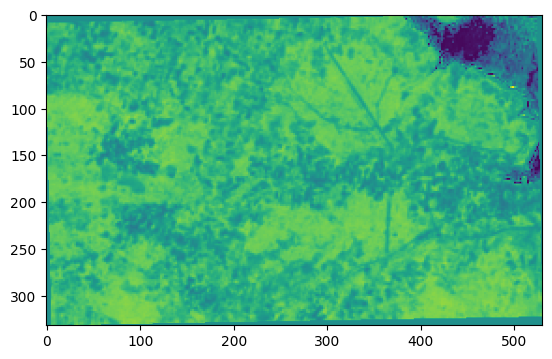

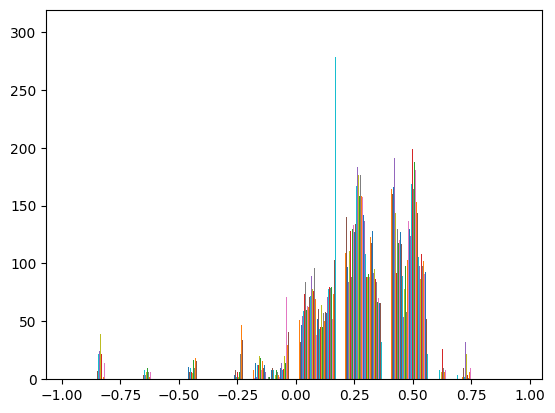

In [262]:
Y = (image[:,:,8] - image[:,:,11])/(image[:,:,8] + image[:,:,11])
Y = np.nan_to_num(Y)
plt.imshow(Y)
plt.show()
plt.hist(Y)
plt.show()

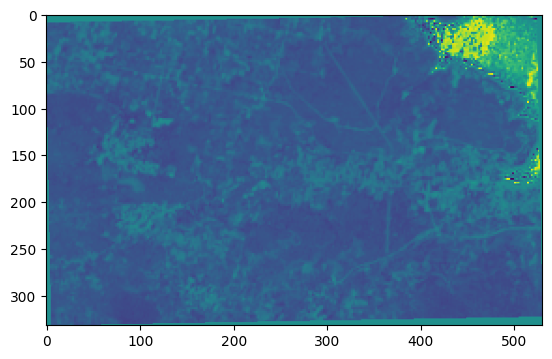

In [249]:
Z = ((X+Y)*1000)/2
plt.imshow(Z)

In [260]:
import numpy as np
from PIL import Image

img1 = Image.fromarray(X)
img1.save('out/ndvi.tiff')
img2 = Image.fromarray(Y)
img2.save('out/ndmi.tiff')


## ZAD 2

In [269]:
import requests
import json

req = requests.get("https://plovput.li-st.net/getObjekti/")
data = json.loads(req.text)

In [252]:
import json

with open("out/data.geojson", 'w') as json_file:
    json.dump(data, json_file, indent=4)


We have 1220 maritime objects in our dataset.
Maritime objects are the sea ​​buoys rearranged accross the coast. 

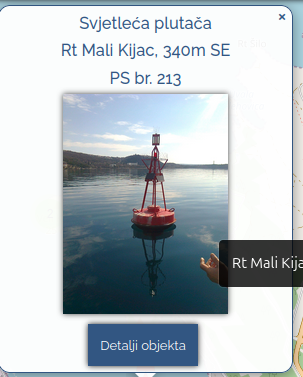


It is used for mooring the ships. 

# Machine learning

Features:
* X,Y,Z : pixels
* NIR (near-infra red): 
* ndvi (normalized differnece vegetation index) 
* ndwi (normalized difference water index) 
* masvi2 (Modified Atmospherically Resistant Vegetation Index 2)
* mtvi2 (Modified Atmospherically Resistant Vegetation Index 2)
* vari (Visible Atmospherically Resistant Index) (VARI)
* tgi (Triangular greenness index)





In [273]:
import pandas as pd
import sklearn 

df = pd.read_csv("data/training_data.csv")
X = df[["Red", "Green", "Blue", "NIR", "ndvi", "ndwi", "msavi2", "mtvi2", "vari", "tgi"]].to_numpy()
y = df["Class"].to_numpy()

# Models

* K-nearest neighbors
* XGBoost
* RandomForest
* Nerual network
* Statistical vector machine
* Decission tree
* Linear discriminat analysis
* Random Forest

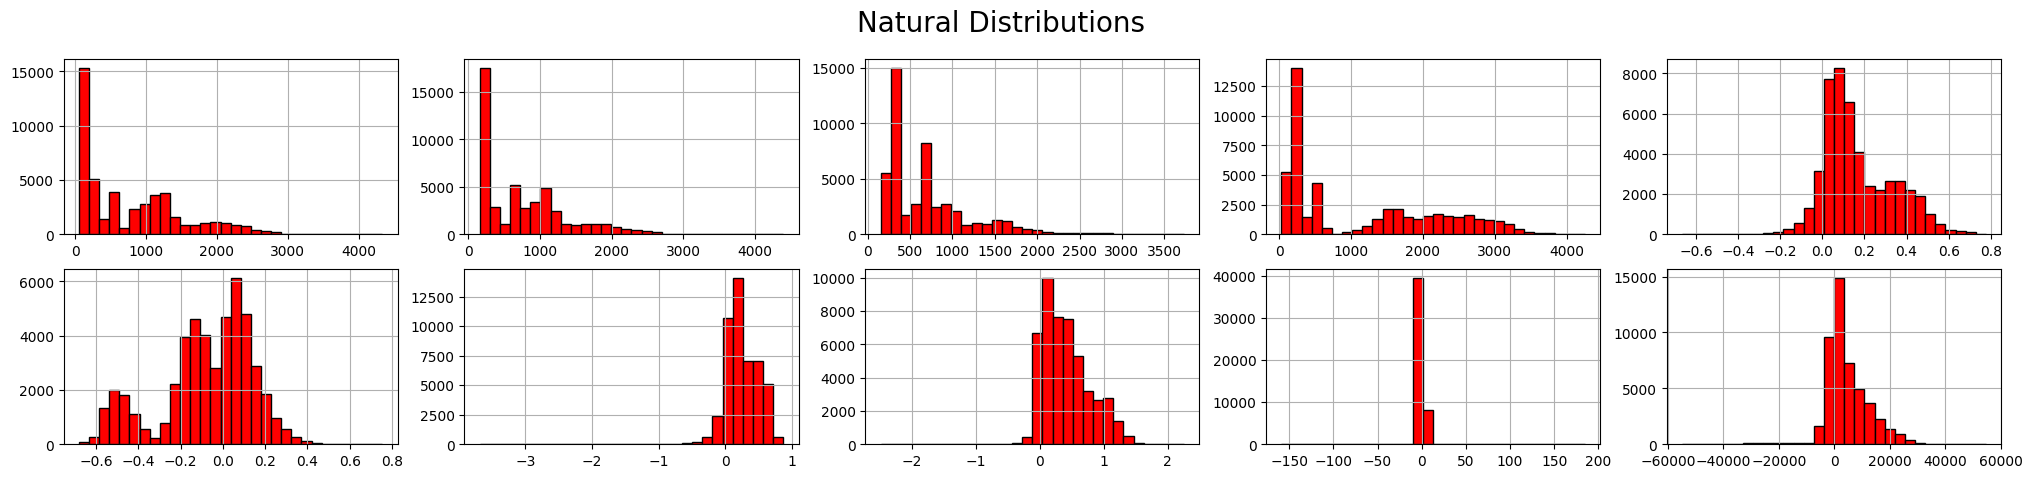

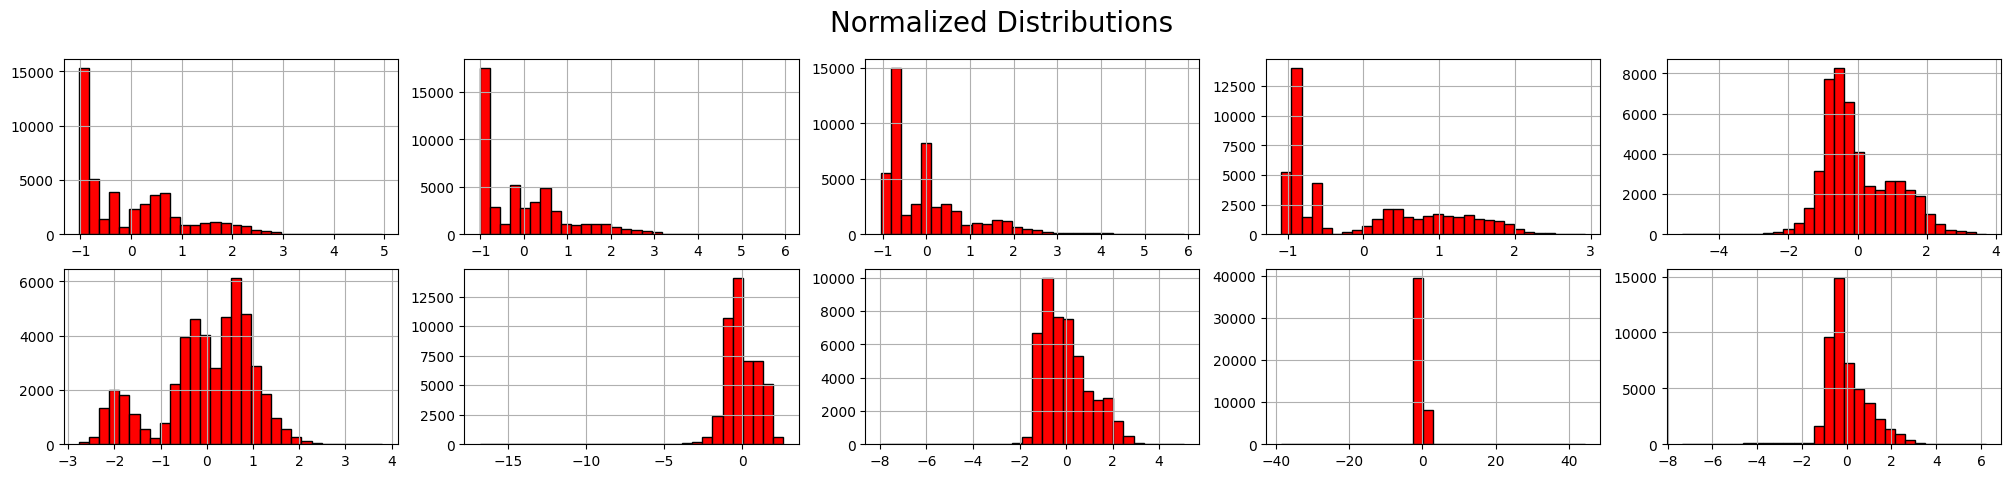

<Figure size 640x480 with 0 Axes>

In [274]:
#plt.hist(X[:,4],bins=30)
def normalize(X):
    N,M = X.shape
    Y = np.zeros([N,M])
    for i in range(M):
        xs = X[:,i]
        xs = (xs - xs.mean()) / xs.std()
        Y[:,i] = xs
    return Y

def vizualize_features(X, title="Normalized Distributions"):
    fig, axes = plt.subplots(2, 5, figsize=(25, 5))
    fig.suptitle(title, fontsize=20)    
    for i in range(2):
        for j in range(5):
            index = j + 5*i
            xs = X[:, index]
            axes[i, j].hist(xs, edgecolor='black', color="red", bins=30)
            axes[i, j].grid(True)
    plt.show()

Y = normalize(X)
vizualize_features(X, "Natural Distributions")
vizualize_features(Y)
plt.subplots_adjust(hspace=0.5)


In [275]:
from functools import reduce

def fact(n):
    xs = [x for x in range(1,n+1)]
    return reduce(lambda x,y:x*y, xs)

def n_choose_k(n, k):
    return int(fact(n)/(fact(n-k)*fact(k)))

n_choose_k(10,2)

45

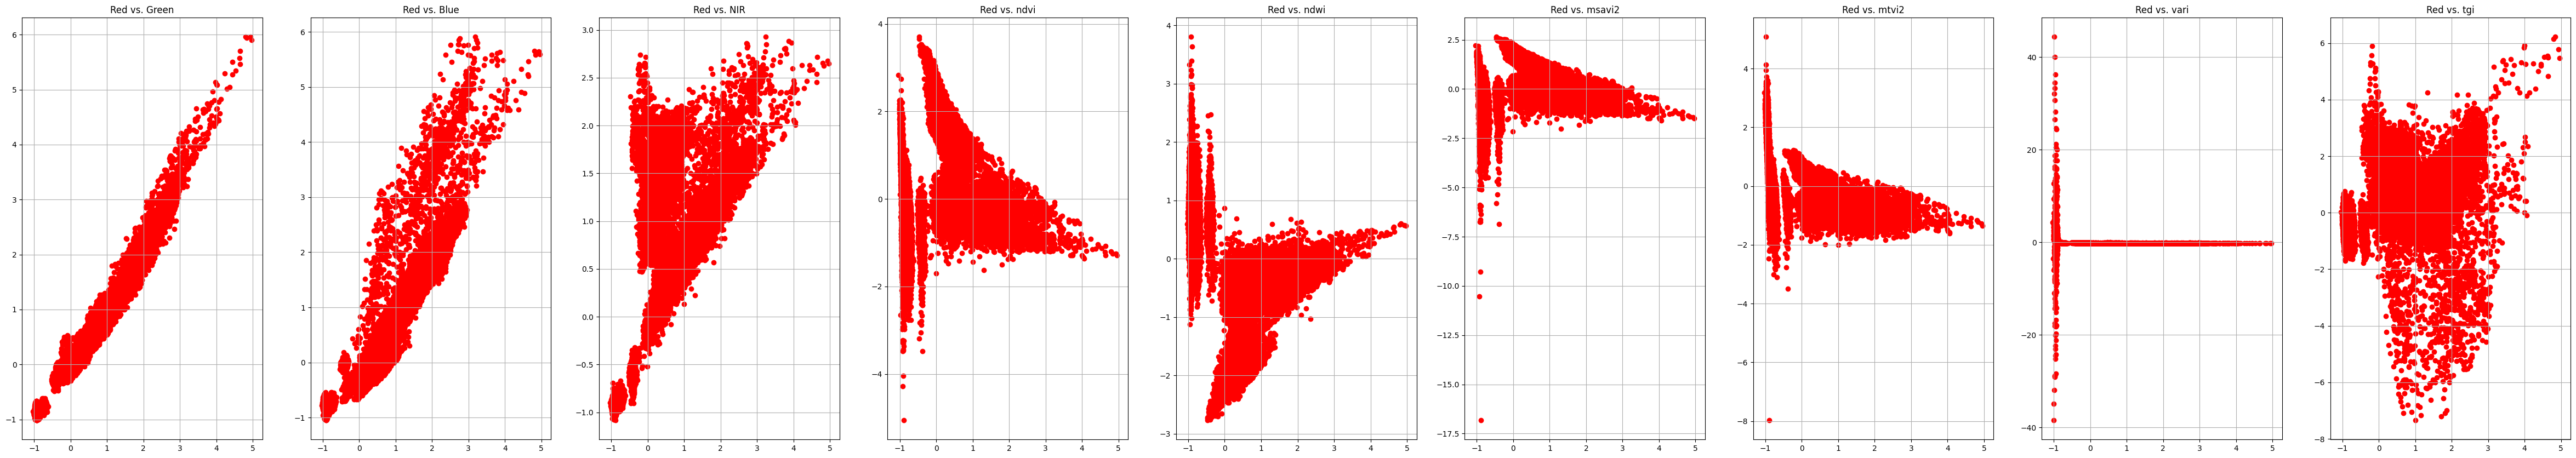

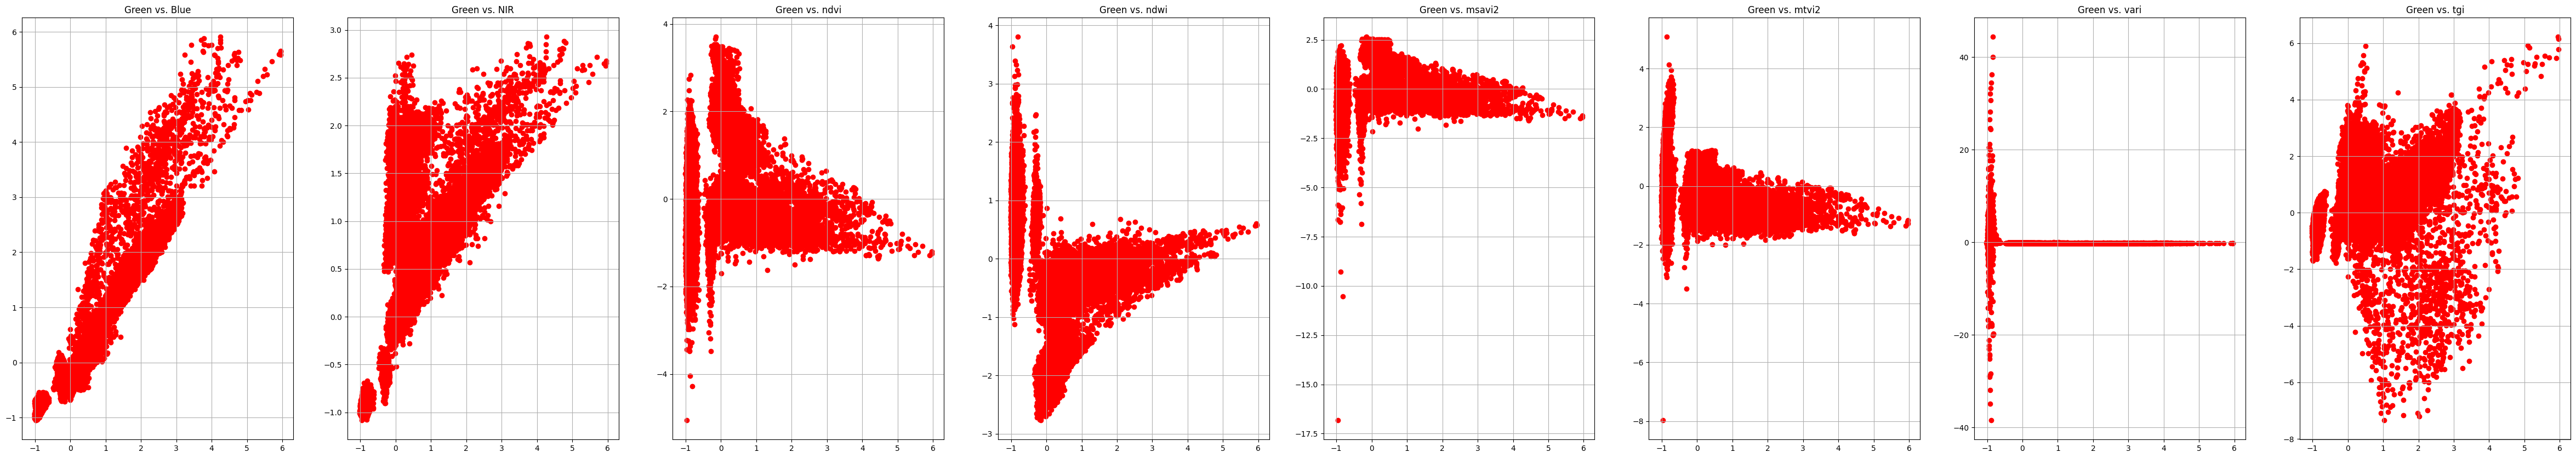

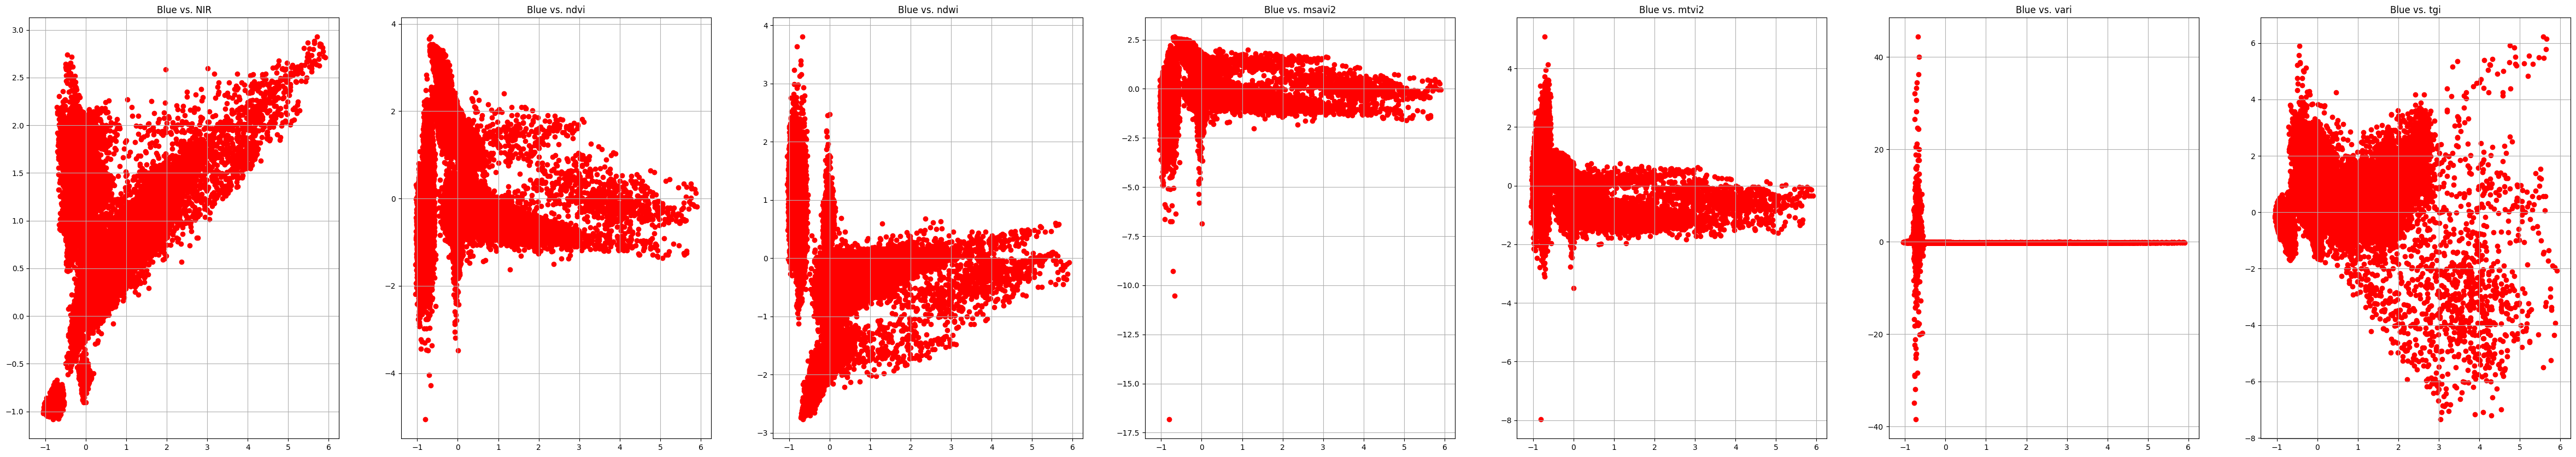

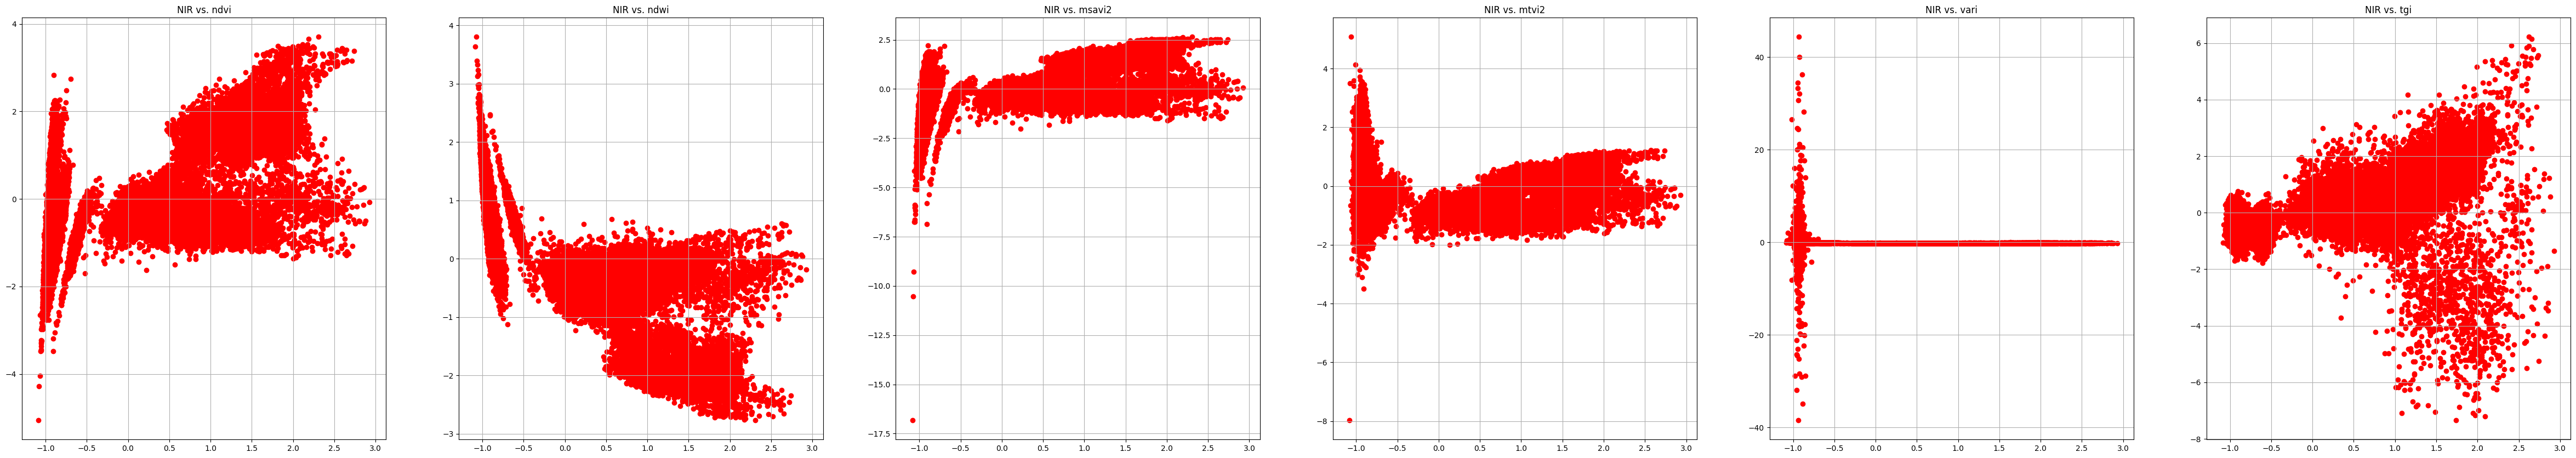

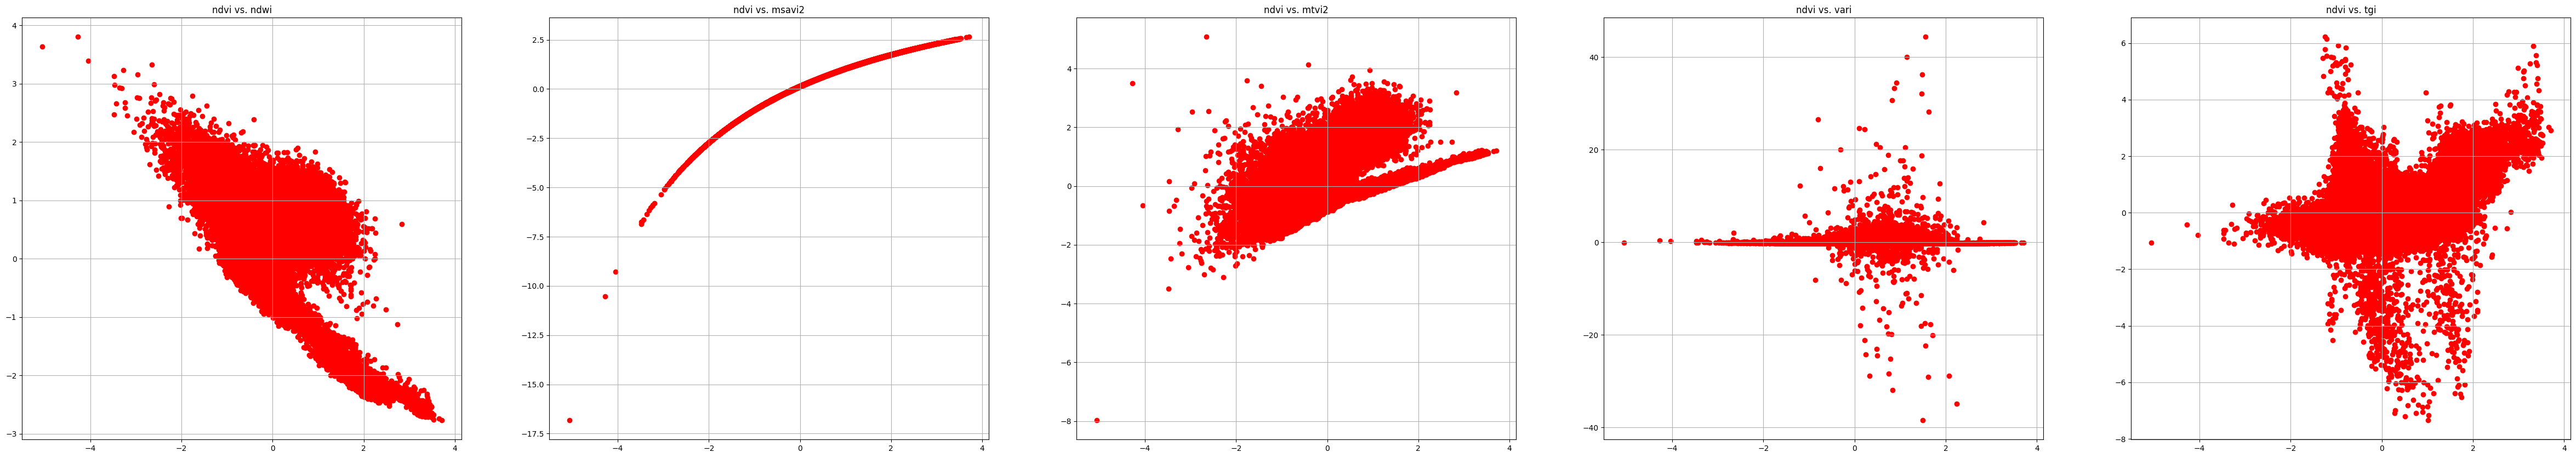

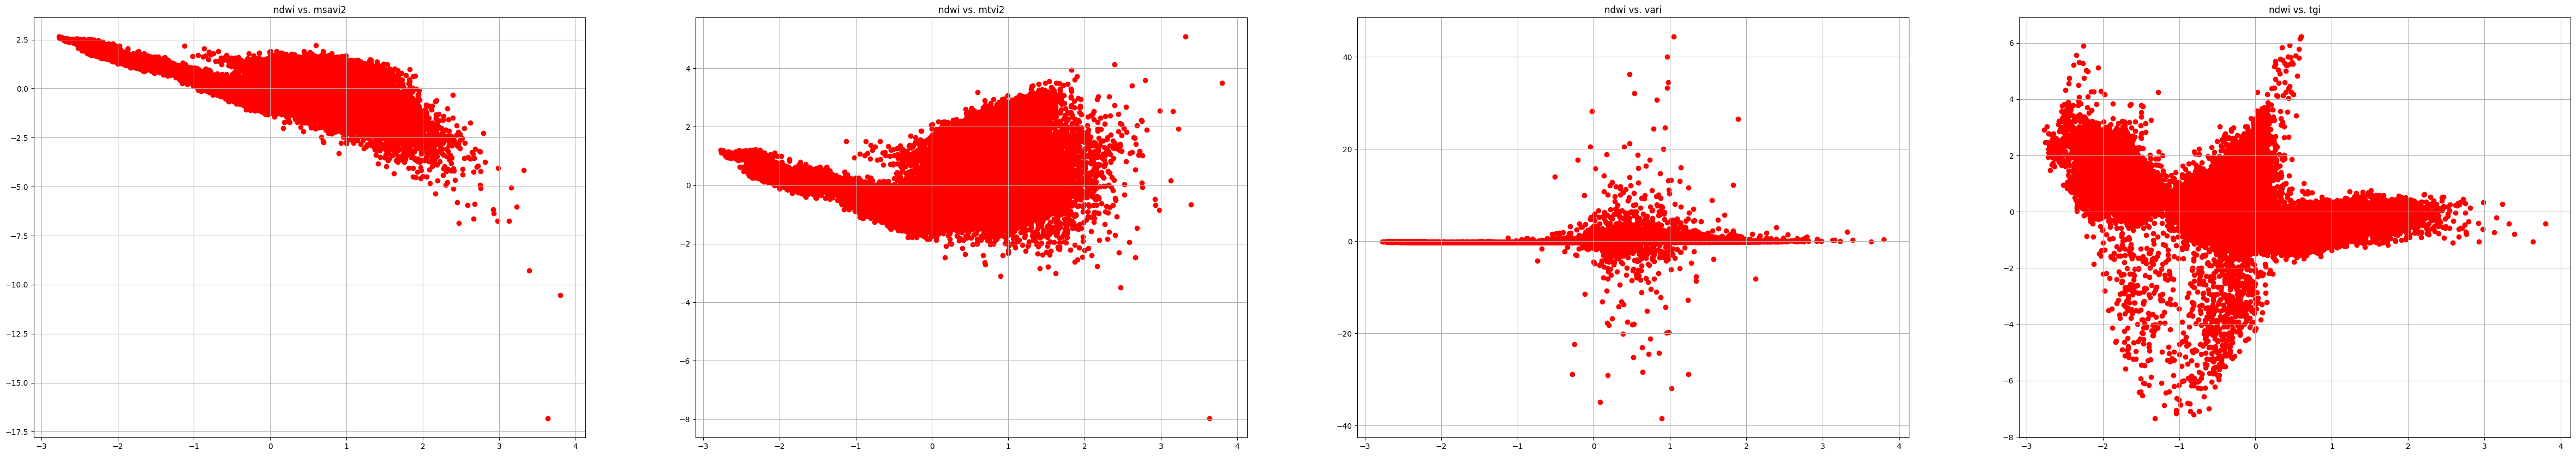

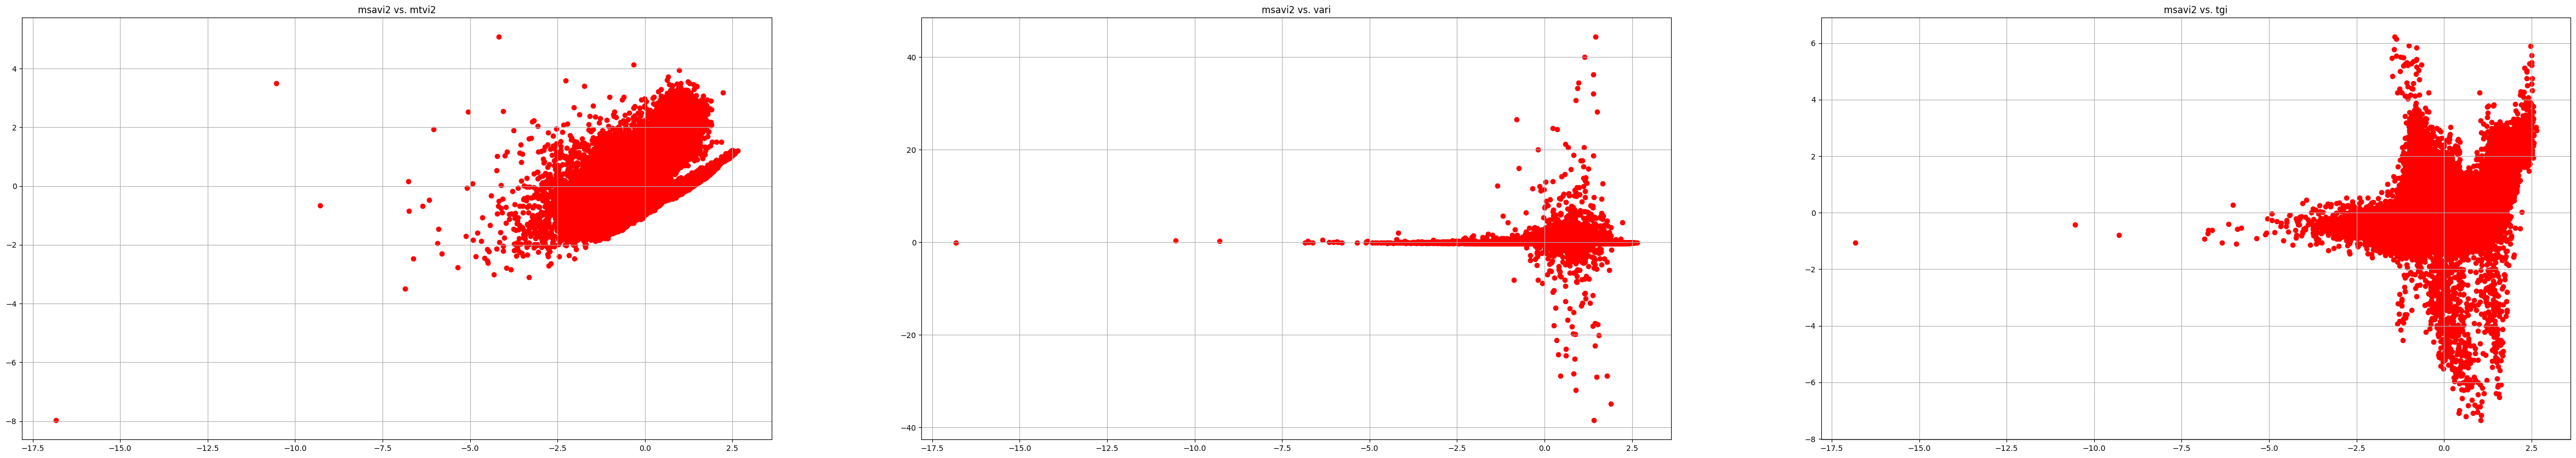

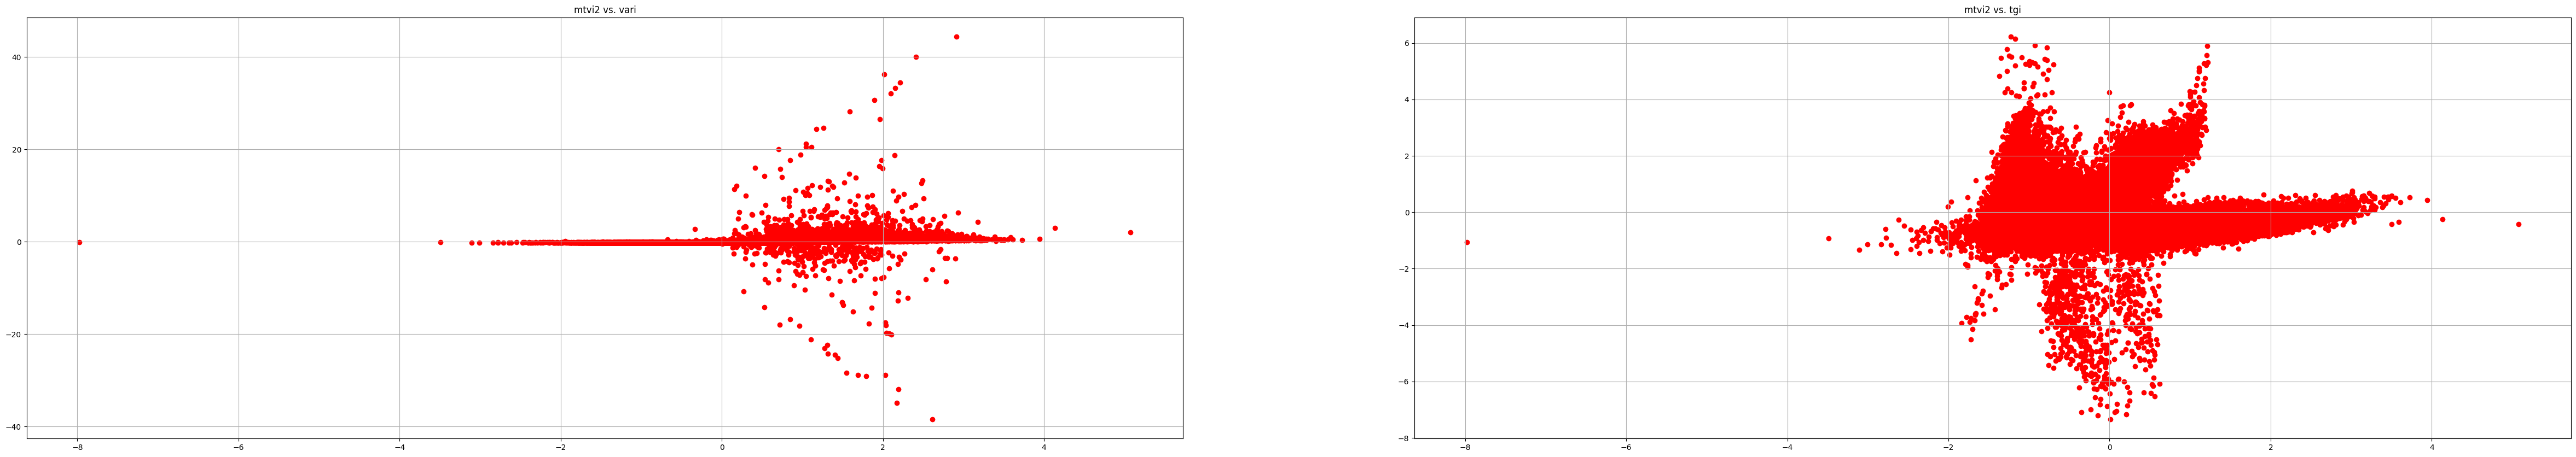

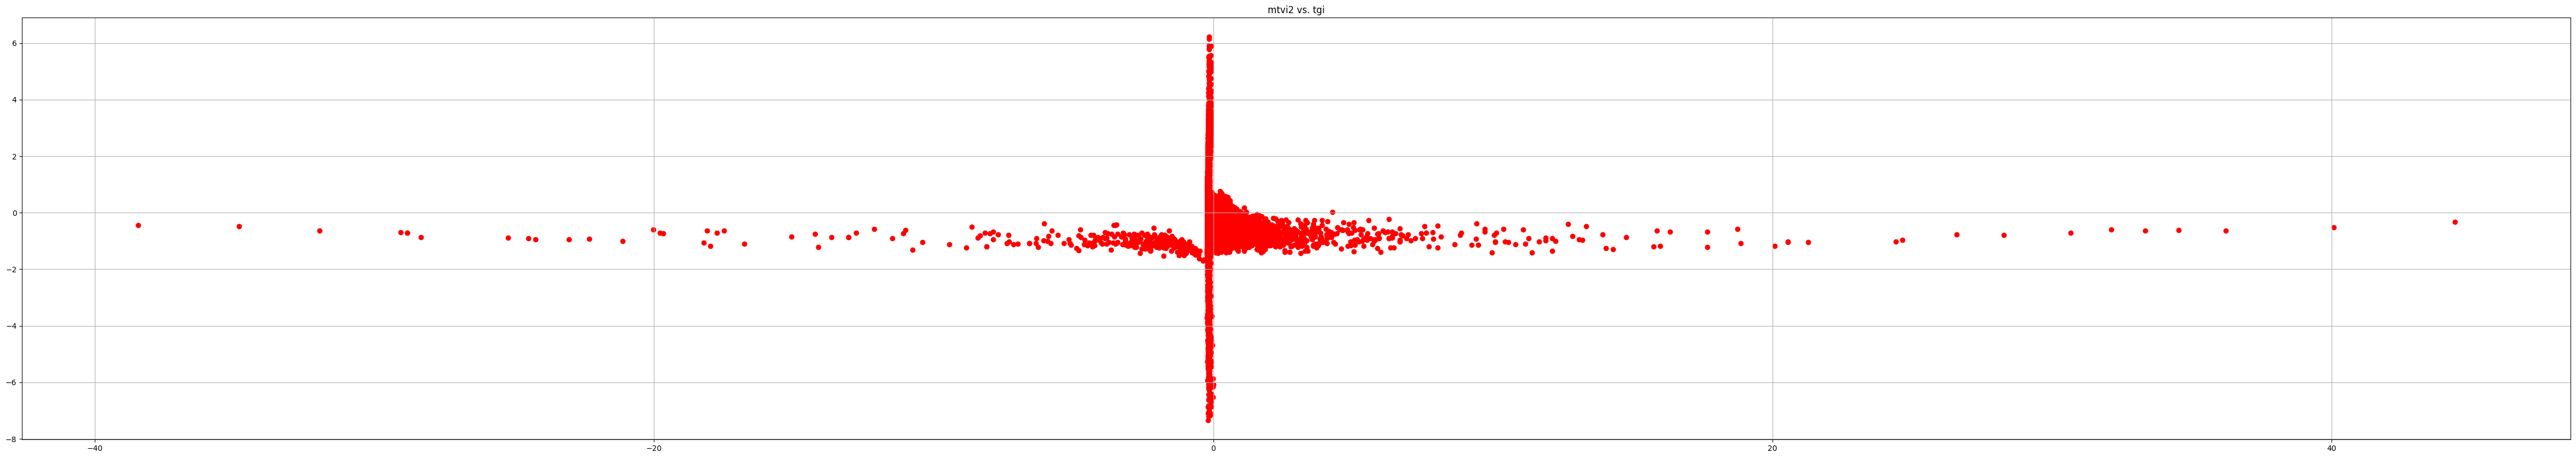

In [276]:
def scatter_plot(X, cols):
    for i in range(9):
        num = 10 - i - 1
        _, axs = plt.subplots(1, num, figsize=(60, 10))
        for j in range(i+1, 10):
            index = j - i - 1
            if num != 1:
                col_a, col_b = cols[i], cols[j]
                axs[index].scatter(X[:, i], X[:, j], color="red")
                axs[index].set_title(f'{col_a} vs. {col_b}')
                axs[index].grid(True)
            else:
                axs.scatter(X[:, i], X[:, j], color="red")
                axs.set_title(f'{col_a} vs. {col_b}')
                axs.grid(True)
    # axes[5, 2].grid(True)
    
scatter_plot(Y, df.columns)

### K-nearest neigbbors
 - A class of the certain data point is determined by the K points closest to the observed data point.
 - Distance measure is usually Euclid distance 
  
 

In [277]:
from sklearn.metrics import confusion_matrix

def eval(y_test, y_pred):
    acc = (y_test == y_pred).sum()/len(y_pred)
    print(acc)
    confusion_matrix(y_test, y_pred)

48142
48142


In [278]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.2, random_state=42) 


In [280]:
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
X_train, X_test, y_train, y_test = train_test_split(Y, y, test_size=0.2, random_state=42) 
print(f"X_train {len(X_train)}, X_test {len(X_test)}, y_train {len(y_train)}, y_test {len(y_test)}")

print(Counter(y_train))

class_one = Counter(y_train)[1]
class_two = Counter(y_train)[2]
class_three = Counter(y_train)[3]
class_one_perc = class_one / (class_one + class_two + class_three)
class_two_perc = class_two / (class_one + class_two + class_three)
class_three_perc = class_three / (class_one + class_two + class_three)
print(f"C0={class_one_perc}")
print(f"C1={class_two_perc}")
print(f"C2={class_three_perc}")

X_train 38513, X_test 9629, y_train 38513, y_test 9629
Counter({np.int64(1): 20379, np.int64(2): 12551, np.int64(0): 5583})
C0=0.6188581840267233
C1=0.3811418159732766
C2=0.0


We have splitted our dataset into 2 parts. One part is the 

In [53]:
model = KNeighborsClassifier(n_neighbors=7) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = (y_test == y_pred).sum()/len(y_pred)
print(acc)

0.9992730293903832


In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1356,    0,    1],
       [   0, 5173,    0],
       [   5,    1, 3093]])

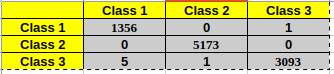

### Neural Network Model

In [55]:
from torch.utils.data import DataLoader, Dataset
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F


#X = torch.from_numpy(Y) 
#y = torch.from_numpy(y)
first_batch  = int(len(X)*0.7)
second_batch = len(X) - first_batch
print(f"B1={len(X)}")
print(f"B1={first_batch} B2={second_batch}")

X_train, X_test = X[0:first_batch, :], X[first_batch:, :]
y_train, y_test = y[0:first_batch], y[first_batch:]



B1=48142
B1=33699 B2=14443


In [56]:
X_train = torch.from_numpy(X_train) if type(X_train) == np.ndarray else X_train
X_test = torch.from_numpy(X_test) if type(X_test) == np.ndarray else X_test

y_train = torch.from_numpy(y_train) if type(y_train) == np.ndarray else y_train
y_test = torch.from_numpy(y_test) if type(y_test) == np.ndarray else y_test

In [57]:
class GeoData(Dataset):
    def __init__(self, X, y):
        first_batch  = int(len(X)*0.7)
        self.X_train, self.X_test = X[0:first_batch, :], X[first_batch:, :]
        self.y_train, self.y_test = y[0:first_batch], y[first_batch:]

    def __len__(self):
        return len(self.X_train)

    def __getitem__(self, idx):
        return self.X_train[idx], self.y_train[idx]
    
class GeoModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(10, 512),
            nn.ReLU(),
            nn.Linear(512, 200),
            nn.ReLU(),
            nn.Linear(200, 3),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

geo_dataset_train  = GeoData(X_train.float(), y_train.long())
geo_dataset_test   = GeoData(X_test.float(), y_test.long())
model = GeoModel()
train_df = DataLoader(geo_dataset_train, batch_size=64, shuffle=True)
test_df  = DataLoader(geo_dataset_test, batch_size=64, shuffle=True)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) 

In [58]:
def evaluate(loader, model):
  model.eval()
  loss_fn = torch.nn.CrossEntropyLoss()
  with torch.no_grad():
    valid_loss = 0
    y_pred  = []
    targets = []
    for input_batch, target_batch in loader:
        logits = model(input_batch)
        loss_val = loss_fn(logits, target_batch)
        valid_loss +=  loss_val.item()
        yp = torch.argmax(F.softmax(logits,dim=1),dim=1)
        y_pred = np.append(y_pred, yp)
        targets = np.append(targets, target_batch.numpy())
    valid_loss /= len(loader)
    tp = np.logical_and((y_pred == 1), (targets == 1)).sum()
    tn = np.logical_and((y_pred == 0), (targets == 0)).sum()
    fn = np.logical_and((y_pred == 0), (targets == 1)).sum()
    fp = np.logical_and((y_pred == 1), (targets == 0)).sum()
    acc = (tp+tn)/(tp+tn+fp+fn)
    precission = tp/(tp+fp)
    recall = tp/(tp+fn)
    f = 2*(precission*recall)/(precission+recall)
    d = {"loss" : valid_loss, 
         "accuracy" : acc.item(),
         "precission" : precission.item(),
         "recall" : recall.item(),
         "f" : f.item()
    }
    C = confusion_matrix(y_pred, targets)
    print(C)
    return d

In [ ]:
N = len(train_df)
train_losses = []
test_losses = []

for epoch in range(100):
    model.train()
    running_loss = 0
    for i, (X_batch,y_batch) in enumerate(train_df):
        model.zero_grad()
        logits = model(X_batch).double()
        loss = loss_fn(logits, y_batch.long())
        loss.backward()
        running_loss += loss
        optimizer.step()
    train_loss = running_loss / N
    print(f"train loss = {train_loss}")
    res = evaluate(test_df, model)
    print(res)
    print("*****")
    train_losses.append(running_loss)


# Decision Trees

Decission tree classification with the Gini index criterion. 

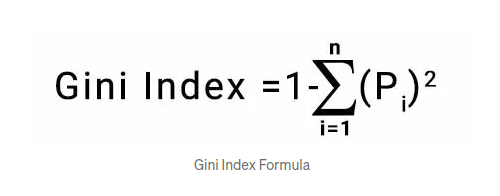

Pi denotes the proportion of data which belongs to the class i.
Gini index criterion is used to represent the "purity" of the split. With each split we actually get the two new groups. Gini coeff will be 0 in the case where there are only represntatives of one class in that group. It also important to consider the number of splits or the tree depth which we want to consider and keep in mind to not overlearn the model. 

In [74]:
X_train = torch.from_numpy(X_train) if type(X_train) == np.ndarray else X_train
X_test = torch.from_numpy(X_test) if type(X_test) == np.ndarray else X_test

y_train = torch.from_numpy(y_train) if type(y_train) == np.ndarray else y_train
y_test = torch.from_numpy(y_test) if type(y_test) == np.ndarray else y_test

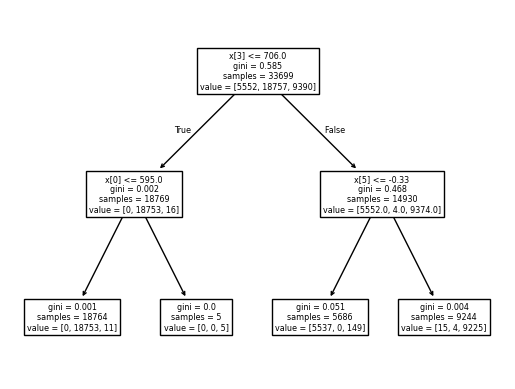

In [98]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
_=tree.plot_tree(clf)

In [ ]:
def acc(clf, X_test, y_test):
    return (sum(clf.predict(X_test) == y_test)/len(y_test)).item()

acc(clf, X_test, y_test)

# Random Forest

Random forest is the combination of the bagging, training decision trees and ansable decision

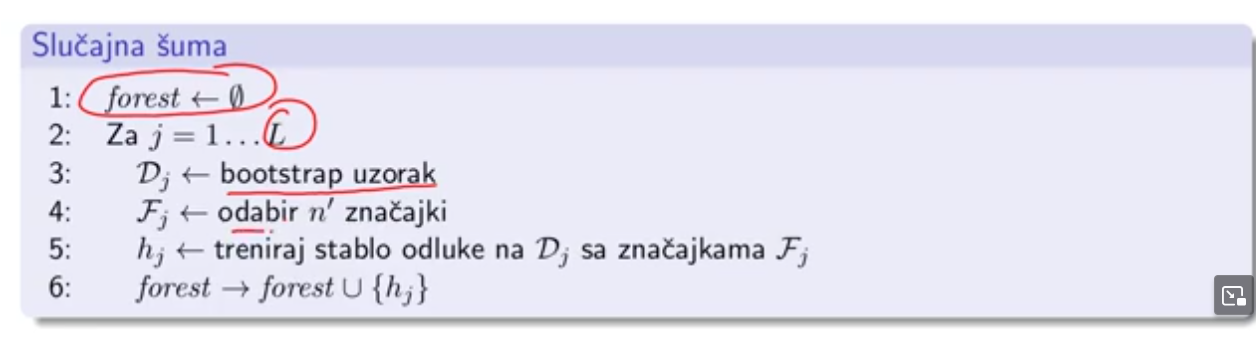



In [200]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)

In [201]:
from sklearn.utils import resample

def train_forest(X, y):
    treeNums = 10
    n = 7
    N = int(0.7*len(X))
    forest = []
    for i in range(treeNums):
        sample_iids = resample(list(range(0, len(X))), n_samples=N, replace=False)
        X_sample, y_sample = X[sample_iids], y[sample_iids]
        fs = resample(list(range(0, 10)), n_samples=7, replace=False)
        # Dx, Dy = X_sample[:, fs], y_sample
        clf = tree.DecisionTreeClassifier(max_depth=3)
        clf = clf.fit(X_sample, y_sample)
        forest.append(clf)
    return forest

def forest_predict_and_eval(forest, X, y):
    R = []
    y = np.array(y)
    for f in forest:
        y_pred = f.predict(X)
        r = y_pred == y
        R.append(r)
    R = np.array(R)
    accs = np.sum(R, axis=1) / len(R[0])
    return accs.mean().item()
forest = train_forest(X_train, y_train)
accs = forest_predict_and_eval(forest, X_train, y_train)
print(accs)

0.9986587139084244


/tmp/ipykernel_5327/354383891.py:20: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments.
  y = np.array(y)


# Adaboost

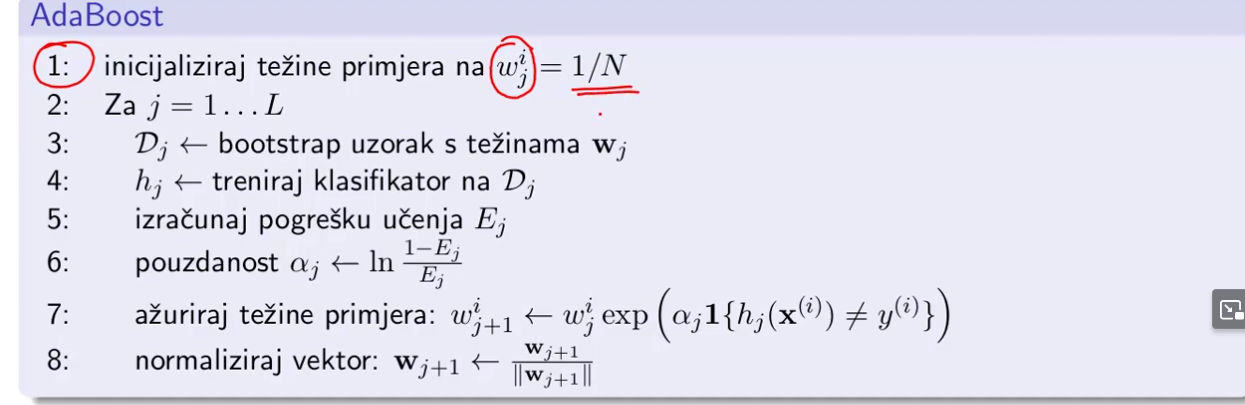